In [1]:
%reload_kedro

[10/30/24 14:29:41] INFO     Resolved project path as: /home/s0nabio/kedroPamflow.                  ]8;id=279682;file:///home/s0nabio/miniconda3/envs/pamflow_kedro_env/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=935440;file:///home/s0nabio/miniconda3/envs/pamflow_kedro_env/lib/python3.10/site-packages/kedro/ipython/__init__.py#175\175]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/30/24 14:29:42] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=746805;file:///home/s0nabio/miniconda3/envs/pamflow_kedro_env/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=222432;file:///home/s0nabio/miniconda3/envs/pamflow_kedro_env/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/30/24 14:29:43] INFO     Kedro project Kedro PamFlow                                            ]8;id=94817;file:///home/s0nabio/miniconda3/envs/pamflow_kedro_env/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=365846;file:///home/s0nabio/miniconda3/envs/pamflow_kedro_env/lib/python3.10/site-packages/kedro/ipython/__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=145087;file:///home/s0nabio/miniconda3/envs/pamflow_kedro_env/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=819680;file:///home/s0nabio/miniconda3/envs/pamflow_kedro_env/lib/python3.10/site-packages/kedro/ipython/__init__.py#142\142]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=629060;file:///home/s0nabio/miniconda3/envs/pamflow_kedro_env/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=400560;file:///home/s0nabio/miniconda3/envs/pamflow_kedro_env/lib/python3.10/site-packages/kedro/ipython/__init__.py#148\148]8;;\

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
unfiltered_detected_species=catalog.load('unfiltered_detected_species@pandas')

#especies_de_interes_pd=catalog.load('especies_de_interes@pandas')

segments=catalog.load('segments@pandas')

#detected_species=catalog.load('detected_species@pandas')

                    INFO     Loading data from unfiltered_detected_species@pandas               ]8;id=293934;file:///home/s0nabio/miniconda3/envs/pamflow_kedro_env/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=962912;file:///home/s0nabio/miniconda3/envs/pamflow_kedro_env/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\
                             (CSVDataset)...                                                                       

[10/30/24 14:29:44] INFO     Loading data from segments@pandas (CSVDataset)...                  ]8;id=46547;file:///home/s0nabio/miniconda3/envs/pamflow_kedro_env/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=179455;file:///home/s0nabio/miniconda3/envs/pamflow_kedro_env/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

In [4]:
#especies_de_interes=unfiltered_detected_species['scientific_name'].sample(150).unique()
#especies_de_interes_pd=pd.DataFrame(especies_de_interes,columns=['scientific_name'])

In [7]:
minimum_observations=catalog.load('params:birdnet_parameters.minimum_observations')

[10/30/24 14:30:24] INFO     Loading data from params:birdnet_parameters.minimum_observations   ]8;id=398179;file:///home/s0nabio/miniconda3/envs/pamflow_kedro_env/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=941421;file:///home/s0nabio/miniconda3/envs/pamflow_kedro_env/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\
                             (MemoryDataset)...                                                                    

# Elegir especies de interés

In [9]:
unfiltered_detected_species['mean_species_confidence']=unfiltered_detected_species.groupby(['scientific_name'])['confidence'].transform('mean')

unfiltered_detected_species=unfiltered_detected_species[unfiltered_detected_species.groupby('scientific_name').transform('size')>=minimum_observations]
unfiltered_detected_species=unfiltered_detected_species[unfiltered_detected_species['mean_species_confidence'].rank(ascending=False,method='dense')<51]


In [13]:

seaborn_data=unfiltered_detected_species[unfiltered_detected_species['mean_species_confidence'].rank(ascending=False,method='dense').isin(list(range(6))
                                                                                                                                          +list(range(44,51))
                                                                                                                                         )]

In [15]:
seaborn_data=seaborn_data.sort_values(by='mean_species_confidence')

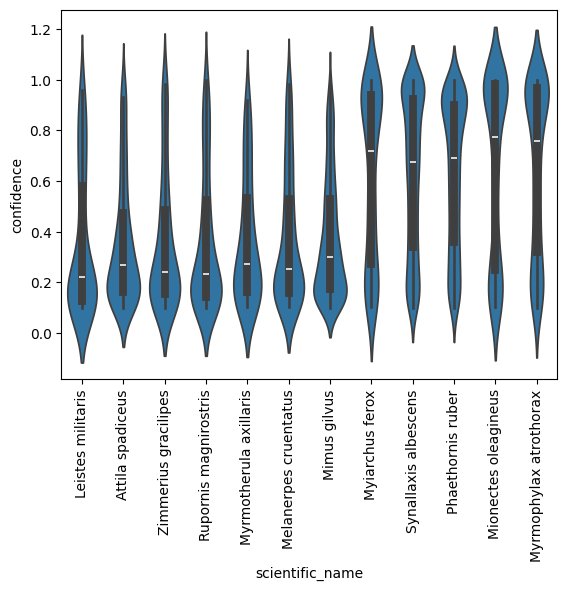

In [18]:
ax=sns.violinplot(data=seaborn_data[['scientific_name','confidence']],
               x='scientific_name',
               y='confidence'
              )

ax.tick_params(axis='x', rotation=90)

In [23]:
especies_de_interes=unfiltered_detected_species[['scientific_name']].drop_duplicates().sort_values(by='scientific_name')

In [24]:
especies_de_interes.to_csv('/home/s0nabio/kedroPamflow/data/input/especies_de_interes/especies_de_interes.csv')

# Revisar

In [ ]:
print('especies de interes')
print(especies_de_interes_pd.shape, especies_de_interes_pd['scientific_name'].nunique())
print('especies detectadas filtradas')
print(detected_species.shape, detected_species['scientific_name'].nunique())
print('especies detectadas filtradas isin()')
print(detected_species[detected_species['scientific_name'].isin(especies_de_interes_pd['scientific_name'])]['scientific_name'].nunique())
print('especies detectadas  isin()')
print(unfiltered_detected_species[unfiltered_detected_species['scientific_name'].isin(especies_de_interes_pd['scientific_name'])]['scientific_name'].nunique())
print('especies en segmentos')
print(segments.shape, segments['scientific_name'].nunique())

In [ ]:
segments['scientific_name'].nunique()